In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd

model_data = pd.read_csv("../../przygotowanie_danych/model_data.csv")
X = model_data[["temperatura", "suma opadów", "wilgotność", "prędkość wiatru", "zachmurzenine", "day_number_in_year"]]
y = model_data['PM2.5']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,shuffle=False)

In [2]:
import optuna
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso

def objective(trial):
    alpha = trial.suggest_float('alpha', 0.01, 1.0)
    model = Lasso(alpha=alpha,random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)

    return r2

study = optuna.create_study(direction='maximize')

improvement_threshold = 0.001
stale_count = 0

best_r2 = -float('inf')

r2_values = []

for _ in range(11000):
    study.optimize(objective, n_trials=1)

    if study.best_value > best_r2:
        best_r2 = study.best_value
        stale_count = 0
    else:
        stale_count += 1

    r2_values.append(best_r2)

    if stale_count >= 11000 or best_r2 >= 1.0:
        break

best_params = study.best_params
best_r2 = study.best_value

print("Najlepsze parametry:", best_params)
print("Najlepszy R^2 Score:", best_r2)


[I 2023-11-10 19:50:19,187] A new study created in memory with name: no-name-58b5d7df-1aed-466a-ad5a-c7d82c17b98b
[I 2023-11-10 19:50:19,199] Trial 0 finished with value: -0.7576251476567812 and parameters: {'alpha': 0.6579103526252406}. Best is trial 0 with value: -0.7576251476567812.
[I 2023-11-10 19:50:19,204] Trial 1 finished with value: -0.7626920767844874 and parameters: {'alpha': 0.5951020493439341}. Best is trial 0 with value: -0.7576251476567812.
[I 2023-11-10 19:50:19,208] Trial 2 finished with value: -0.7399988800785511 and parameters: {'alpha': 0.8830327266961548}. Best is trial 2 with value: -0.7399988800785511.
[I 2023-11-10 19:50:19,213] Trial 3 finished with value: -0.78458261037975 and parameters: {'alpha': 0.3324380582544205}. Best is trial 2 with value: -0.7399988800785511.
[I 2023-11-10 19:50:19,219] Trial 4 finished with value: -0.7972640276801175 and parameters: {'alpha': 0.18622523995851828}. Best is trial 2 with value: -0.7399988800785511.
[I 2023-11-10 19:50:19

Najlepsze parametry: {'alpha': 0.9999999243868769}
Najlepszy R^2 Score: -0.7311710348891192


Średni błąd kwadratowy (MSE): 281.45481945178443
Procentowa zgodność: -73.12%


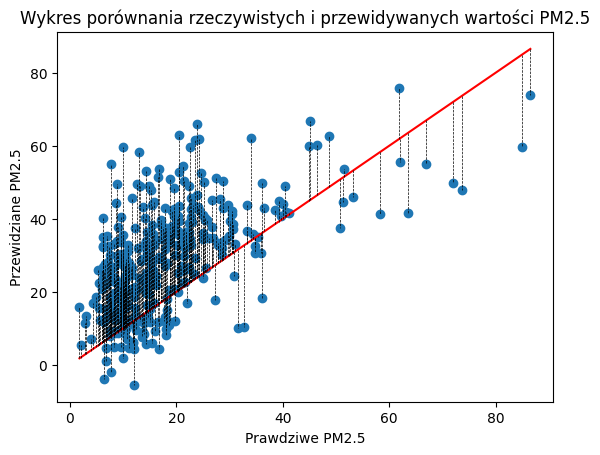

,Rzeczywiste wartości (y_test),Przewidywane wartości (y_pred),Różnica
0,10.46,20.332403,-9.872403
1,10.38,20.378733,-9.998733
2,10.29,27.112874,-16.822874
3,6.89,22.405917,-15.515917
4,7.56,24.531607,-16.971607
...,...,...,...
344,9.90,21.412720,-11.512720
345,8.40,8.697373,-0.297373
346,10.20,12.297319,-2.097319
347,8.40,14.274851,-5.874851


In [3]:
import numpy as np
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


params =  {'alpha': 0.9999999243868769}
model = Lasso(**params,random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Średni błąd kwadratowy (MSE): {mse}")
percent_match = r2 * 100
print(f"Procentowa zgodność: {percent_match:.2f}%")

y_test = y_test.reset_index(drop=True)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', label='y=x')
plt.scatter(y_test, y_pred)
for i in range(len(y_test)):
    plt.plot([y_test[i], y_test[i]], [y_test[i], y_pred[i]], 'k--', lw=0.5)
plt.xlabel("Prawdziwe PM2.5")
plt.ylabel("Przewidziane PM2.5")
plt.title("Wykres porównania rzeczywistych i przewidywanych wartości PM2.5")
plt.show()

results = pd.DataFrame({'Rzeczywiste wartości (y_test)': y_test, 'Przewidywane wartości (y_pred)': y_pred})
results['Różnica'] = results['Rzeczywiste wartości (y_test)'] - results['Przewidywane wartości (y_pred)']
results



